# Problem Statement
## Introduction

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Business Objectives
The company wants to understand the **driving factors (or driver variables) behind loan default**, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

# Import Libraries

In [1]:
# Import Libraries
import os
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset using pandas
loan_df = pd.read_csv("loan/loan.csv")

In [3]:
loan_df.shape

(39717, 111)

In [4]:
loan_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Section 1: Data Cleaning

In [5]:
# Removing current loan status as it's not needed in the analysis
loan_df = loan_df[loan_df['loan_status']!='Current'].reset_index(drop=True)

## Inspect the null values

In [6]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

<AxesSubplot:>

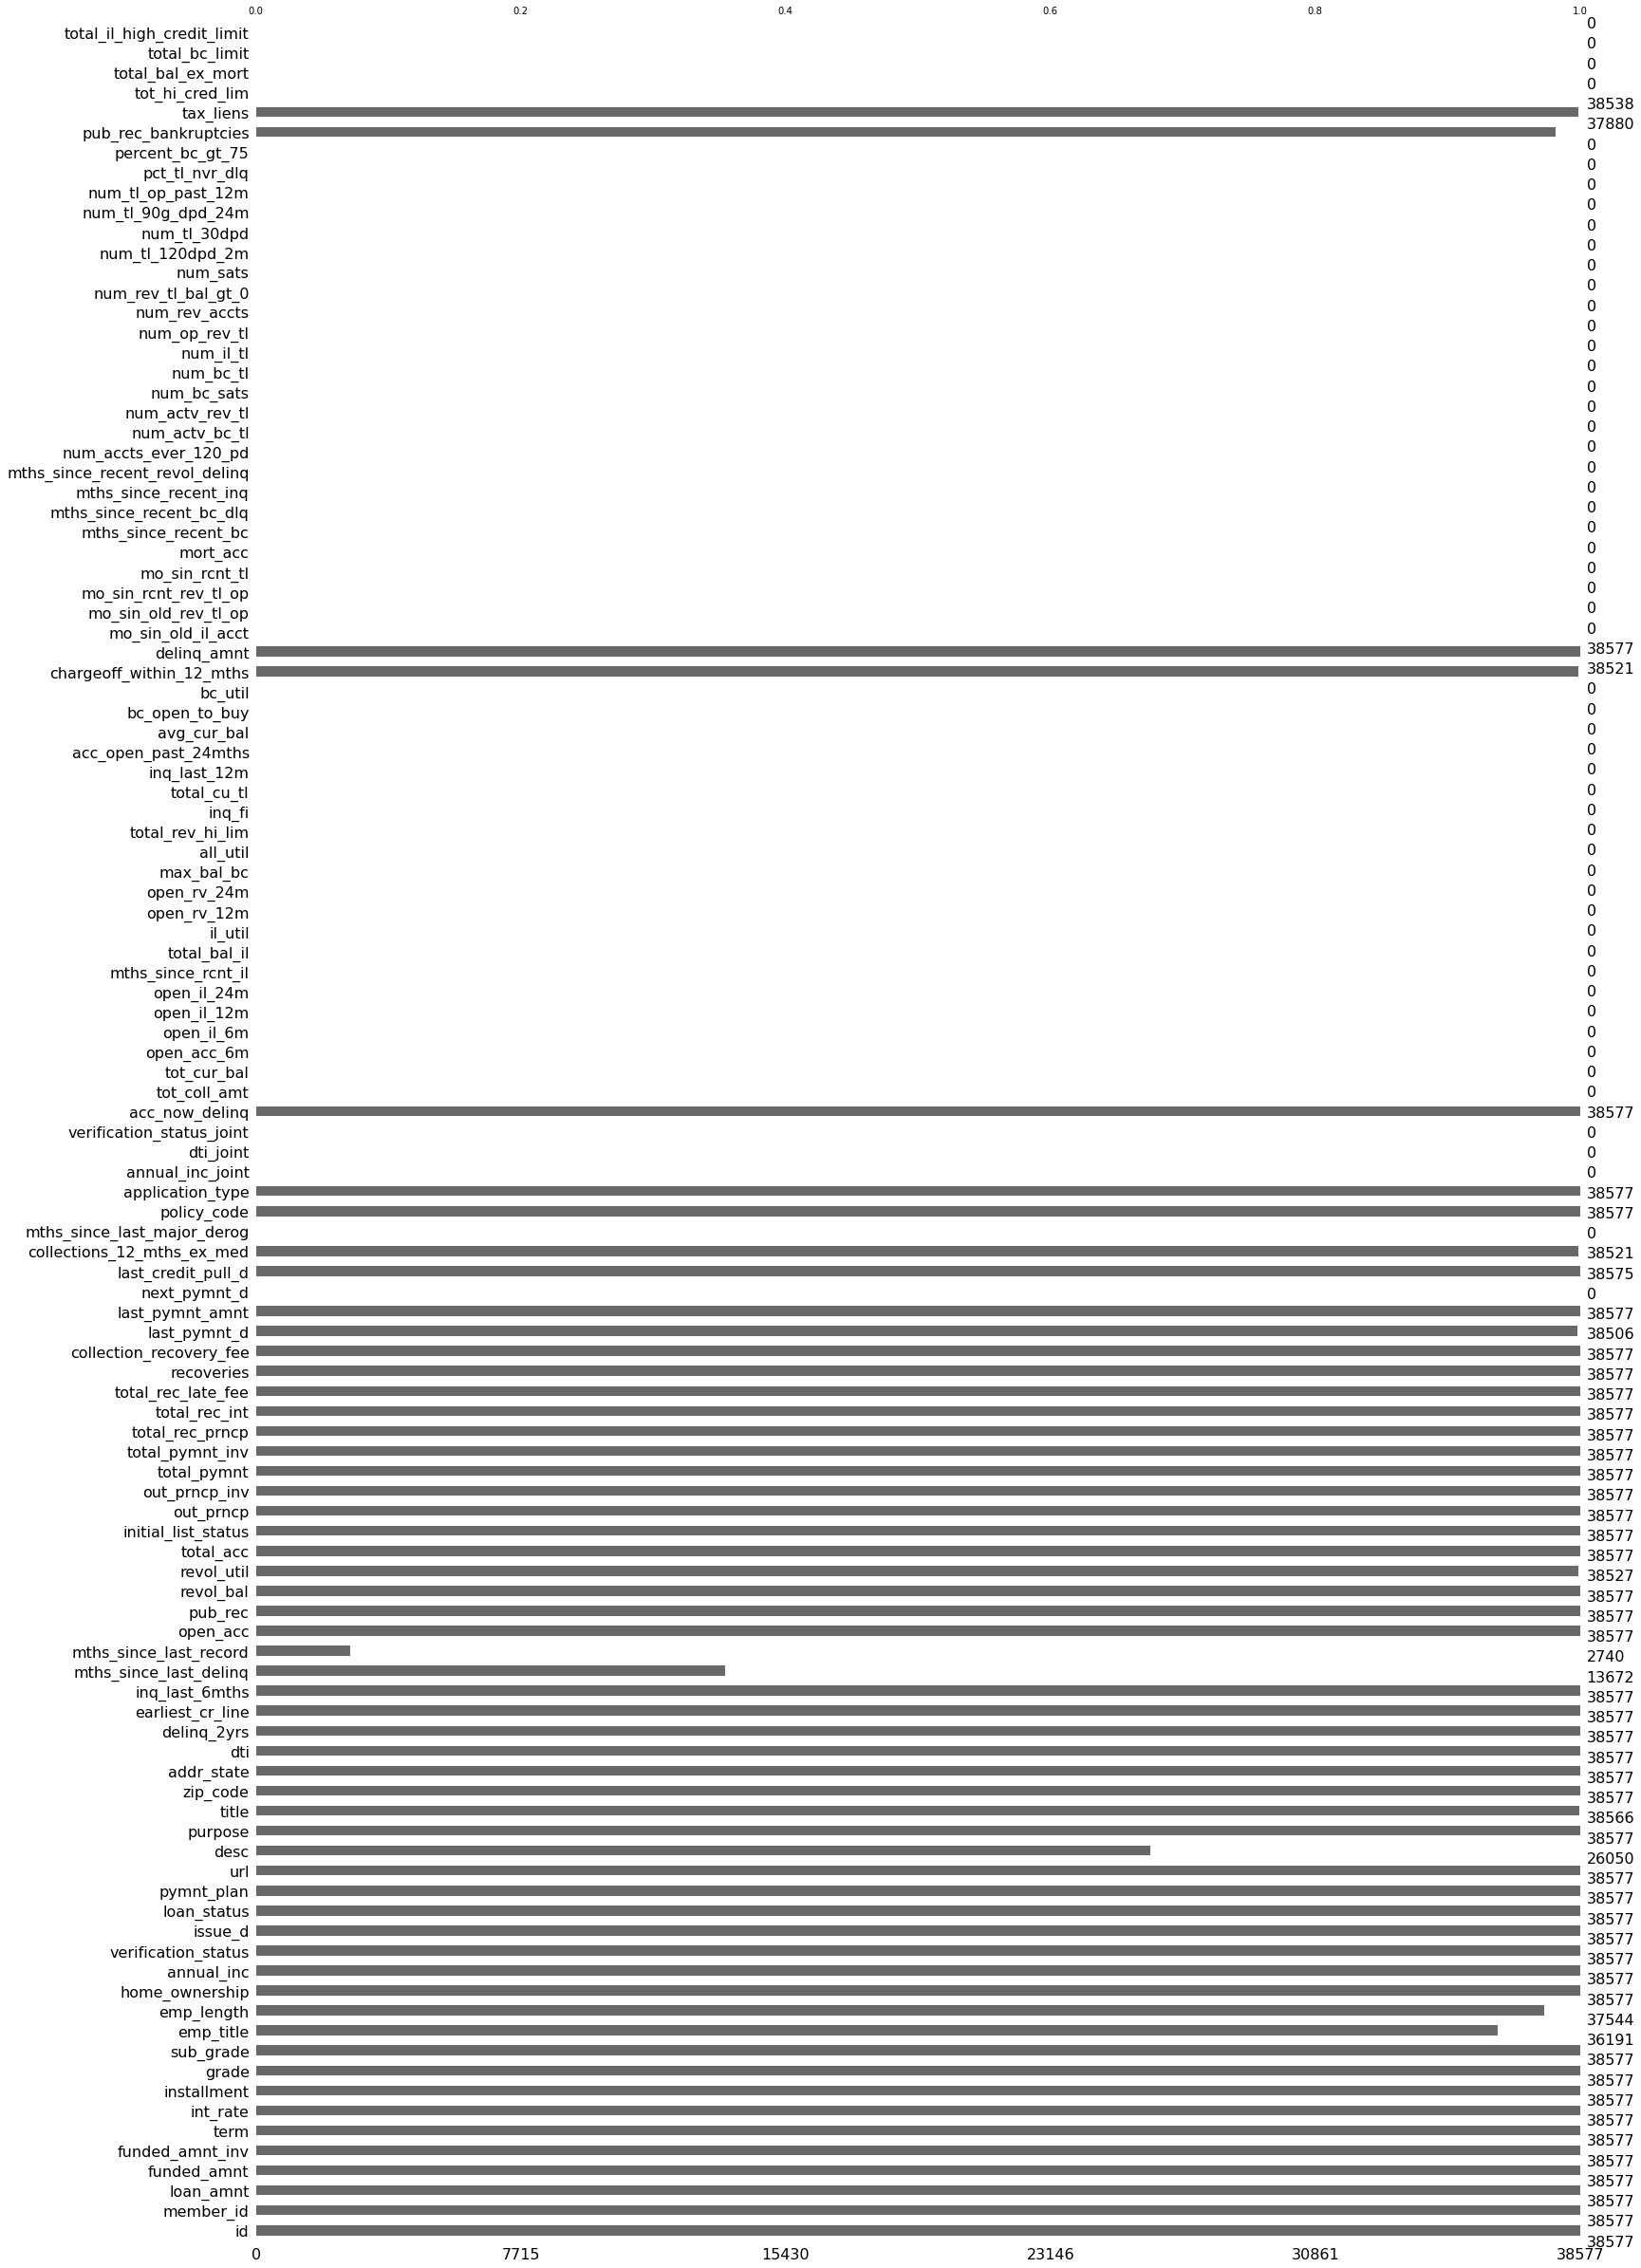

In [7]:
# Understanding the percentage of missing values
msno.bar(loan_df)

<center><b>Note: Plot shows that there are many columns/features which are having 100% missing values.</b></center>

In [8]:
null_per = (loan_df.isnull().sum()/len(loan_df.index))*100
null_per[null_per>=60]

mths_since_last_delinq             64.559193
mths_since_last_record             92.897322
next_pymnt_d                      100.000000
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

Many features have 100% null values; These features mostly regard for candidates' bank account(s) history like number of accounts opened since x months for different types of accounts.

In [9]:
#dropping columns whose missing values is 60% or higher
loan_df.drop(list(null_per[null_per>=60].index),axis=1,inplace=True)
print("Number of features in dataframe after dropping features with high frequency null values: ", loan_df.columns.shape[0])

Number of features in dataframe after dropping features with high frequency null values:  54


In [10]:
loan_df.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

## Inspect Duplicate records

In [11]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


No duplicate records found in the dataset

## Handling unnecessary rows/columns

In [12]:
unique_df = pd.DataFrame(loan_df.nunique()).rename(columns={0:"Num of unique Values"})

print(unique_df[unique_df['Num of unique Values']==1].index)

# Remove the features which have only 1 unique value
not_useful_feat = list(unique_df[unique_df['Num of unique Values']==1].index)

print("Number of features which have same value for all rows:", len(not_useful_feat))

loan_df = loan_df.drop(not_useful_feat, axis=1)
loan_df.shape

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')
Number of features which have same value for all rows: 11


(38577, 43)

In [13]:
loan_df.nunique()

id                         38577
member_id                  38577
loan_amnt                    870
funded_amnt                 1019
funded_amnt_inv             8050
term                           2
int_rate                     370
installment                15022
grade                          7
sub_grade                     35
emp_title                  28027
emp_length                    11
home_ownership                 5
annual_inc                  5215
verification_status            3
issue_d                       55
loan_status                    2
url                        38577
desc                       25803
purpose                       14
title                      19297
zip_code                     822
addr_state                    50
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21275
revol_util

## Inspect columns datatypes

In [14]:
loan_df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec             

## Remove redundant features

In [15]:
# url represents same information as id
print(loan_df['url'][0], loan_df['id'][0])

loan_df = loan_df.drop('url', axis=1)

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501 1077501


## Remove irrelavant features

Features related to investors does to have any relation with the loan status (target feature) & it is something
on how the money is funded for the loan by the lending clud which has no relation with the loan status.

1. funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
2. total_pymnt_inv: Payments received to date for portion of total amount funded by investors

Therefore, removing these 3 features which are not useful for our further analysis

In [16]:
loan_df = loan_df.drop(['funded_amnt_inv', 'total_pymnt_inv'],axis=1)

'id', 'member_id' are id features which are only identifiers and unique for individual records.

These can be removed



In [17]:
loan_df = loan_df.drop(['id','member_id'],axis=1)

The company wants to know which loan applications are risky. Therefore, the fields that are created after a loan application is approved doesn't make sense for our analysis towards the business objective.

In [18]:
irrelavant_feat = ["total_pymnt", "total_rec_prncp", "total_rec_int",
                   "total_rec_late_fee","recoveries","collection_recovery_fee",
                   "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]

loan_df.drop(columns=irrelavant_feat, inplace=True)
loan_df.shape

(38577, 29)

## Proper data type conversions

In [19]:
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.strip().split(" ")[0]) )

loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.split("%")[0] ))

loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x if pd.isna(x) \
                                                    else int(x.replace("<", "").replace("+","").strip().split(" ")[0]) )

loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: x if pd.isna(x)  else float(x.split("%")[0]))

## Standardizing values - strings/dates

In [20]:
def clean_title(text):
    '''
    To clean the title text
    Args:
        text (str): raw text to be cleaned
    Returns:
        text (str): cleaned text after preprocessing
    '''
    
    text = text.lower()
    text = " ".join([i.strip() for i in text.split()])
    return text


loan_df['title'] = loan_df['title'].fillna("")
loan_df['title'] = loan_df['title'].apply(lambda x: clean_title(x))

def clean_description(desc):
    
    desc = desc.lower()
    desc = desc.strip("<br>")
    desc = " ".join([i.strip() for i in desc.split()])
    
    return desc

loan_df['desc'] = loan_df['desc'].fillna("")
loan_df['desc'] = loan_df['desc'].apply(lambda x: clean_description(x))

def clean_emp_title(title):
    
    title = title.lower()
    title = title.translate(str.maketrans('', '', string.punctuation))
    title = " ".join([i.strip() for i in title.split()])
    
    return title

loan_df['emp_title'] = loan_df['emp_title'].fillna("")
loan_df['emp_title'] = loan_df['emp_title'].apply(lambda x: clean_emp_title(x))


# Even after cleaning the following string features have too many unique values, so dropping them
loan_df = loan_df.drop(['desc', 'emp_title', 'title'], axis=1)

## Checking the Correlation between the columns

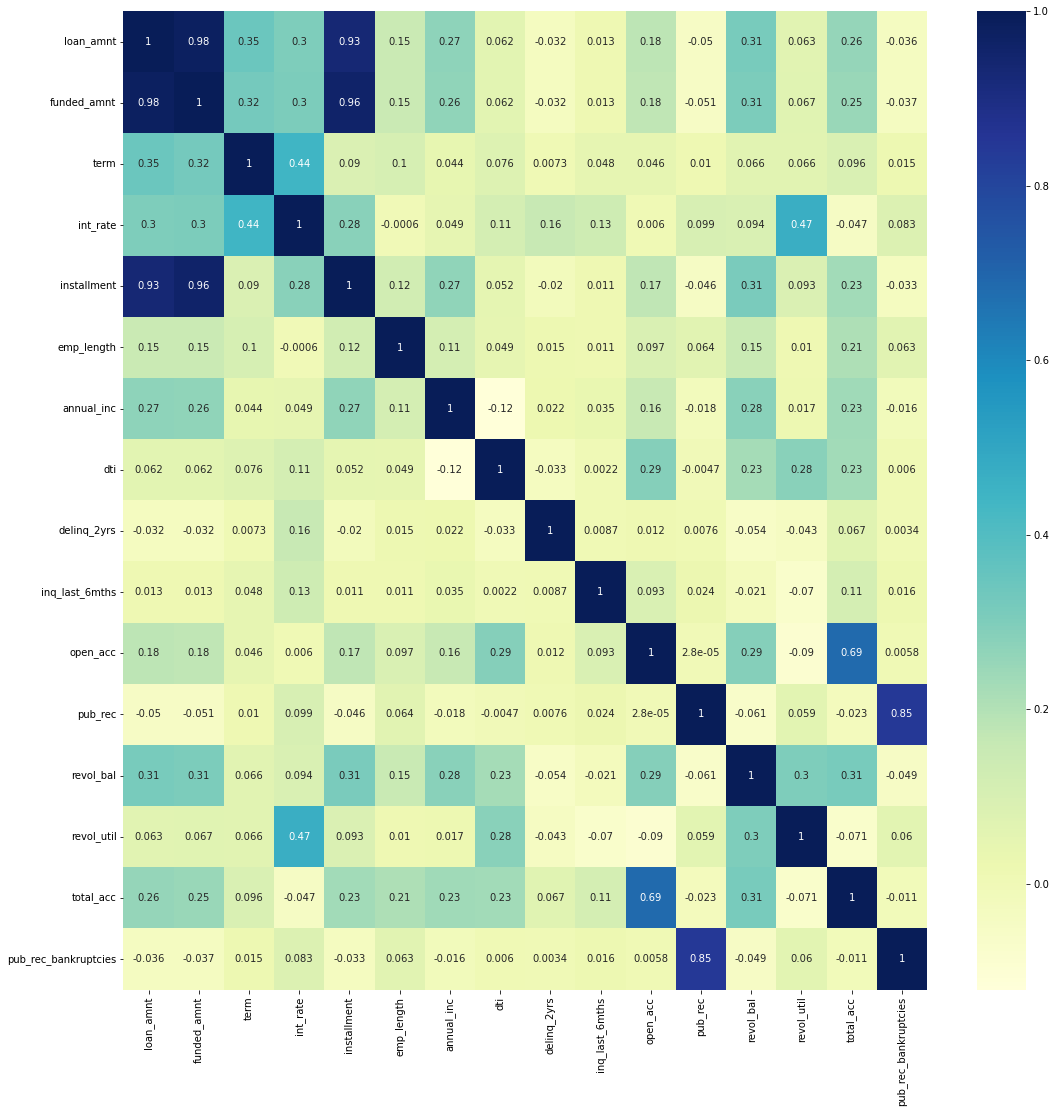

In [21]:
# plotting correlation heatmap
plt.figure(figsize=(18,18))
dataplot = sns.heatmap(loan_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

**Observations**
- loan_amnt & funded_amt are highly correlated.
- pub_rec_bankruptcies & pub_rec are highly correlated.
- open_acc & total_acc

In [22]:
# Numerical columns
num_feat = ['loan_amnt','funded_amnt', 'installment', 
            'annual_inc', 'dti', 'revol_bal', 'revol_util'
           ]

# Categorical columns
cat_feat = ['term','grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 
            'zip_code', 'addr_state',
            'pub_rec_bankruptcies', 'pub_rec','int_rate', 'emp_length', 
            'inq_last_6mths','delinq_2yrs','open_acc','total_acc'
           ]

target = "loan_status"

# Date Columns
date_feat = ['issue_d', 'earliest_cr_line']

## Detecting Outliers

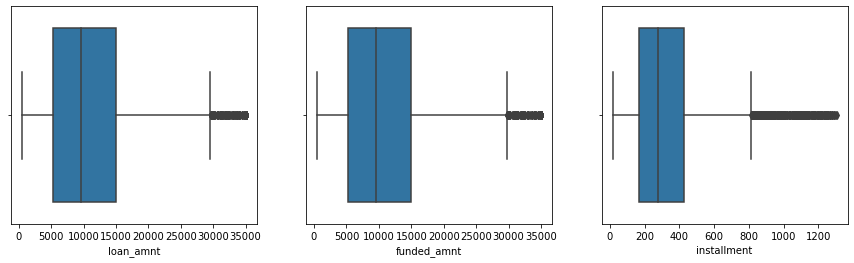

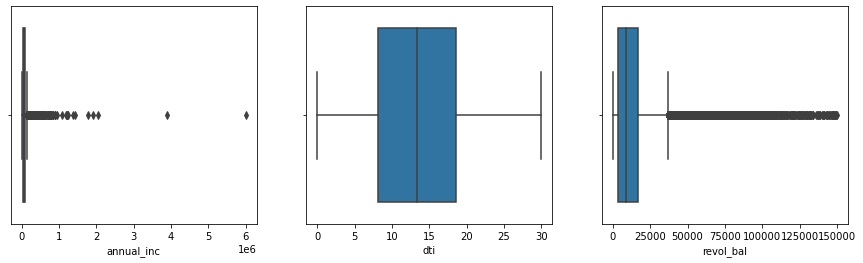

In [23]:
#number of features considered
size = 6

#get the names of all the columns
cols=num_feat

#Plot boxplot for all attributes in a grid
n_cols = 3
n_rows = 2

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(15, 4))
    for j in range(n_cols):
        sns.boxplot(x=cols[i*n_cols+j], data=loan_df, ax=ax[j])

**Observations:** 
- annual income has got few extreme outliers. The extreme outlier needs to be removed.

In [24]:
# Remove the extreme outliers 
idxs = loan_df[loan_df['annual_inc']>1000000].index.to_list()
print(idxs)

loan_df = loan_df.drop(idxs).reset_index(drop=True)

[6656, 9790, 20272, 22411, 23026, 24622, 26424, 27766, 28499, 28967, 32292, 32842, 33164, 37949]


<AxesSubplot:xlabel='annual_inc'>

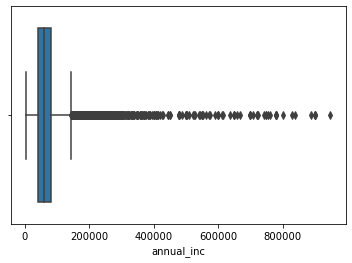

In [25]:
sns.boxplot(x="annual_inc", data=loan_df)

## Derived features

In [26]:
# create year & month features for all the date columns
loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df['issue_d'].str.split('-').str

loan_df['earliest_cr_line_month'], loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].str.split('-').str

In [28]:
# creating column for ratio of funded amount to the annual income
loan_df['loan_inc_ratio'] = loan_df['funded_amnt']*100/loan_df['annual_inc']

In [29]:
# difference of amount between loan request & funded amount
loan_df['diff_loan_funded_amnt']  = loan_df['funded_amnt']-loan_df['loan_amnt']

In [31]:
# standarizing annual income column
loan_df['annual_inc'] = loan_df['annual_inc'] / 1000

loan_df['annual_inc'].describe()

count    38563.000000
mean        68.109797
std         47.423521
min          4.000000
25%         40.000000
50%         58.800000
75%         82.000000
max        948.000000
Name: annual_inc_lakhs, dtype: float64

In [46]:
# create a feature to get the number of days since the first credit line 
today = dt.datetime.today()

def days_from_earliest_cr_line (d):
    
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
        
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = dt.datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days

In [47]:
days_from_earliest_cr_line("Jan-68")

19944

In [36]:
loan_df['days_from_earliest_cr_line'] = loan_df['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan_df['days_from_earliest_cr_line'].describe()

count    38563.000000
mean      9316.478775
std       2491.599042
min       5029.000000
25%       7647.000000
50%       8835.000000
75%      10478.000000
max      27979.000000
Name: days_from_earliest_cr_line, dtype: float64

In [37]:
# drop the date features 
loan_df = loan_df.drop(['issue_d','earliest_cr_line'],axis=1)

In [39]:
loan_df.isnull().sum()

loan_amnt                        0
funded_amnt                      0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1033
home_ownership                   0
verification_status              0
loan_status                      0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
pub_rec_bankruptcies           696
issue_d_month                    0
issue_d_year                     0
earliest_cr_line_month           0
earliest_cr_line_year            0
loan_inc_ratio                   0
diff_loan_funded_amn

# Section 2: Data Analysis

## Univariate Analysis

## Bivariate Analysis

## Important driver Variables

## Final Observations